In [5]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [6]:
nba_data = pd.read_csv('Data/nba_data.csv')
nba_data.head()

,Unnamed: 0,rank,player,pos,age,team_id,g,gs,mp,fg,...,tov_pct,usg_pct,ows,dws,ws,ws_per_48,obpm,dbpm,bpm,vorp
0,0,1,Alex Abrines,SG,25,OKC,31,2,588,56,...,7.9,12.2,0.1,0.6,0.6,0.053,-2.4,-0.9,-3.4,-0.2
1,2,3,Jaylen Adams,PG,22,ATL,34,1,428,38,...,19.7,13.5,-0.1,0.2,0.1,0.011,-3.1,-1.3,-4.4,-0.3
2,3,4,Steven Adams,C,25,OKC,80,80,2669,481,...,12.6,16.4,5.1,4.0,9.1,0.163,0.6,2.1,2.7,3.2
3,4,5,Bam Adebayo,C,21,MIA,82,28,1913,280,...,17.1,15.8,3.4,3.4,6.8,0.171,-0.6,3.6,3.0,2.4
4,7,8,LaMarcus Aldridge,C,33,SAS,81,81,2687,684,...,8.8,26.9,6.4,2.9,9.3,0.167,1.2,0.5,1.6,2.5


In [7]:
nba_data = nba_data.set_index('rank')

In [8]:
test_data = nba_data.drop(['Unnamed: 0', 'player', 'pos', 'team_id'], axis=1, inplace=True)


In [10]:
nba_data.head()

,age,g,gs,mp,fg,fga,fg_pct,fg3,fg3a,fg3_pct,...,tov_pct,usg_pct,ows,dws,ws,ws_per_48,obpm,dbpm,bpm,vorp
rank,,,,,,,,,,,,,,,,,,,,,
1,25,31,2,588,56,157,0.357,41,127,0.323,...,7.9,12.2,0.1,0.6,0.6,0.053,-2.4,-0.9,-3.4,-0.2
3,22,34,1,428,38,110,0.345,25,74,0.338,...,19.7,13.5,-0.1,0.2,0.1,0.011,-3.1,-1.3,-4.4,-0.3
4,25,80,80,2669,481,809,0.595,0,2,0.000,...,12.6,16.4,5.1,4.0,9.1,0.163,0.6,2.1,2.7,3.2
5,21,82,28,1913,280,486,0.576,3,15,0.200,...,17.1,15.8,3.4,3.4,6.8,0.171,-0.6,3.6,3.0,2.4
8,33,81,81,2687,684,1319,0.519,10,42,0.238,...,8.8,26.9,6.4,2.9,9.3,0.167,1.2,0.5,1.6,2.5


In [3]:
# Plot and show scatter
# plt.scatter(X[:, 0], X[:, 1])
# plt.show()

In [11]:
# Create a kmeans model using k = 12
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5)

# Fit the model to the data
kmeans.fit(nba_data)

# Use the data to predict the clusters
# save the predictions as `predicted_clusters`
# predicted_clusters = kmeans.predict(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
#plt.scatter(X[:, 0], X[:, 1], c=predicted_clusters, s=50, cmap='viridis')
#plt.show()

In [12]:
# Print the cluster centers and cluster labels
centers = kmeans.cluster_centers_
labels = kmeans.labels_

In [13]:
centers

array([[ 2.63913043e+01,  7.69565217e+01,  7.69565217e+01,
         2.61186957e+03,  6.63565217e+02,  1.40921739e+03,
         4.73391304e-01,  1.74782609e+02,  4.77739130e+02,
         3.43478261e-01,  4.88782609e+02,  9.31478261e+02,
         5.23521739e-01,  5.33608696e-01,  3.56521739e+02,
         4.32478261e+02,  8.25956522e-01,  1.05782609e+02,
         4.52217391e+02,  5.58000000e+02,  4.11086957e+02,
         8.83913043e+01,  5.33913043e+01,  2.24913043e+02,
         1.92869565e+02,  1.85843478e+03,  3.39652174e+01,
         8.64782609e+00,  1.83521739e+01,  2.26086957e+00,
         6.20869565e+00,  6.36956522e+00,  1.21347826e+01,
         4.69130435e+00,  5.69130435e+00,  1.38260870e+00,
         5.93478261e+00,  7.30869565e+00,  5.37391304e+00,
         1.14347826e+00,  7.00000000e-01,  2.95652174e+00,
         2.53478261e+00,  2.42434783e+01,  9.17826087e+00,
         1.94304348e+01,  2.38695652e+00,  6.54347826e+00,
         6.76956522e+00,  1.28913043e+01,  4.94347826e+0

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, RegularPolygon
from matplotlib.path import Path
from matplotlib.projections.polar import PolarAxes
from matplotlib.projections import register_projection
from matplotlib.spines import Spine
from matplotlib.transforms import Affine2D

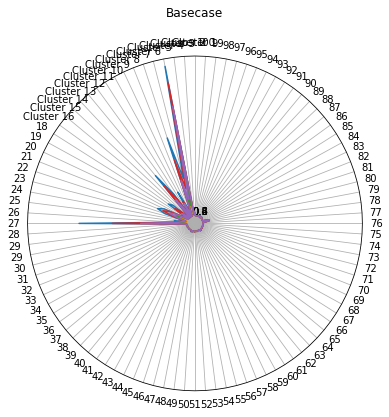

In [10]:
def radar_factory(num_vars, frame='circle'):
    """Create a radar chart with `num_vars` axes.

    This function creates a RadarAxes projection and registers it.

    Parameters
    ----------
    num_vars : int
        Number of variables for radar chart.
    frame : {'circle' | 'polygon'}
        Shape of frame surrounding axes.

    """
    # calculate evenly-spaced axis angles
    theta = np.linspace(0, 2*np.pi, num_vars, endpoint=False)

    class RadarAxes(PolarAxes):

        name = 'radar'

        def __init__(self, *args, **kwargs):
            super().__init__(*args, **kwargs)
            # rotate plot such that the first axis is at the top
            self.set_theta_zero_location('N')

        def fill(self, *args, closed=True, **kwargs):
            """Override fill so that line is closed by default"""
            return super().fill(closed=closed, *args, **kwargs)

        def plot(self, *args, **kwargs):
            """Override plot so that line is closed by default"""
            lines = super().plot(*args, **kwargs)
            for line in lines:
                self._close_line(line)

        def _close_line(self, line):
            x, y = line.get_data()
            # FIXME: markers at x[0], y[0] get doubled-up
            if x[0] != x[-1]:
                x = np.concatenate((x, [x[0]]))
                y = np.concatenate((y, [y[0]]))
                line.set_data(x, y)

        def set_varlabels(self, labels):
            self.set_thetagrids(np.degrees(theta), labels)

        def _gen_axes_patch(self):
            # The Axes patch must be centered at (0.5, 0.5) and of radius 0.5
            # in axes coordinates.
            if frame == 'circle':
                return Circle((0.5, 0.5), 0.5)
            elif frame == 'polygon':
                return RegularPolygon((0.5, 0.5), num_vars,
                                      radius=.5, edgecolor="k")
            else:
                raise ValueError("unknown value for 'frame': %s" % frame)

        def draw(self, renderer):
            """ Draw. If frame is polygon, make gridlines polygon-shaped """
            if frame == 'polygon':
                gridlines = self.yaxis.get_gridlines()
                for gl in gridlines:
                    gl.get_path()._interpolation_steps = num_vars
            super().draw(renderer)


        def _gen_axes_spines(self):
            if frame == 'circle':
                return super()._gen_axes_spines()
            elif frame == 'polygon':
                # spine_type must be 'left'/'right'/'top'/'bottom'/'circle'.
                spine = Spine(axes=self,
                              spine_type='circle',
                              path=Path.unit_regular_polygon(num_vars))
                # unit_regular_polygon gives a polygon of radius 1 centered at
                # (0, 0) but we want a polygon of radius 0.5 centered at (0.5,
                # 0.5) in axes coordinates.
                spine.set_transform(Affine2D().scale(.5).translate(.5, .5)
                                    + self.transAxes)


                return {'polar': spine}
            else:
                raise ValueError("unknown value for 'frame': %s" % frame)

    register_projection(RadarAxes)
    return theta


data = [['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5', 'Cluster 6', 'Cluster 7', 'Cluster 8', 'Cluster 9', 'Cluster 10', 'Cluster 11', 'Cluster 12', 'Cluster 13', 'Cluster 14', 'Cluster 15', 'Cluster 16', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100',],
        ('Basecase', [
            [2.63913043e+01,  7.69565217e+01,  7.69565217e+01,
         2.61186957e+03,  6.63565217e+02,  1.40921739e+03,
         4.73391304e-01,  1.74782609e+02,  4.77739130e+02,
         3.43478261e-01,  4.88782609e+02,  9.31478261e+02,
         5.23521739e-01,  5.33608696e-01,  3.56521739e+02,
         4.32478261e+02,  8.25956522e-01,  1.05782609e+02,
         4.52217391e+02,  5.58000000e+02,  4.11086957e+02,
         8.83913043e+01,  5.33913043e+01,  2.24913043e+02,
         1.92869565e+02,  1.85843478e+03,  3.39652174e+01,
         8.64782609e+00,  1.83521739e+01,  2.26086957e+00,
         6.20869565e+00,  6.36956522e+00,  1.21347826e+01,
         4.69130435e+00,  5.69130435e+00,  1.38260870e+00,
         5.93478261e+00,  7.30869565e+00,  5.37391304e+00,
         1.14347826e+00,  7.00000000e-01,  2.95652174e+00,
         2.53478261e+00,  2.42434783e+01,  9.17826087e+00,
         1.94304348e+01,  2.38695652e+00,  6.54347826e+00,
         6.76956522e+00,  1.28913043e+01,  4.94347826e+00,
         6.00000000e+00,  1.48695652e+00,  6.32608696e+00,
         7.80434783e+00,  5.69130435e+00,  1.21304348e+00,
         7.47826087e-01,  3.13478261e+00,  2.68260870e+00,
         2.56565217e+01,  1.21695652e+01,  2.58086957e+01,
         3.16521739e+00,  8.66956522e+00,  9.00434783e+00,
         1.71217391e+01,  6.55652174e+00,  7.95652174e+00,
         1.97826087e+00,  8.37826087e+00,  1.03521739e+01,
         7.53913043e+00,  1.60434783e+00,  1.00434783e+00,
         4.15652174e+00,  3.55217391e+00,  3.40739130e+01,
         1.13782609e+02,  1.09347826e+02,  2.23260870e+01,
         5.80956522e-01,  3.29913043e-01,  3.08130435e-01,
         4.39565217e+00,  1.85956522e+01,  1.15260870e+01,
         2.61434783e+01,  1.60434783e+00,  1.73043478e+00,
         1.22608696e+01,  2.96826087e+01,  5.53478261e+00,
         2.99130435e+00,  8.53478261e+00,  1.56869565e-01,
         3.82173913e+00,  3.08695652e-01,  4.13478261e+00,
         4.04347826e+00],
            [2.63358779e+01,  3.87480916e+01,  5.47328244e+00,
         5.32175573e+02,  6.99923664e+01,  1.60687023e+02,
         4.39740458e-01,  2.01984733e+01,  6.17786260e+01,
         2.79419847e-01,  4.97938931e+01,  9.89083969e+01,
         4.98328244e-01,  5.00198473e-01,  2.80763359e+01,
         3.92595420e+01,  7.17274809e-01,  2.49541985e+01,
         7.60534351e+01,  1.01007634e+02,  4.36488550e+01,
         1.52595420e+01,  1.11374046e+01,  2.54045802e+01,
         5.54809160e+01,  1.88259542e+02,  1.41900763e+01,
         1.89465649e+00,  4.37862595e+00,  5.53435115e-01,
         1.68854962e+00,  1.34198473e+00,  2.68778626e+00,
         7.73282443e-01,  1.08244275e+00,  6.42748092e-01,
         2.00534351e+00,  2.64961832e+00,  1.15496183e+00,
         4.19847328e-01,  2.92366412e-01,  6.84732824e-01,
         1.48244275e+00,  5.11984733e+00,  4.79083969e+00,
         1.09816794e+01,  1.35572519e+00,  4.16412214e+00,
         3.43511450e+00,  6.81603053e+00,  1.93435115e+00,
         2.70916031e+00,  1.64580153e+00,  5.09236641e+00,
         6.74198473e+00,  2.89389313e+00,  1.06030534e+00,
         7.69465649e-01,  1.75038168e+00,  3.83816794e+00,
         1.28671756e+01,  6.39312977e+00,  1.46557252e+01,
         1.81145038e+00,  5.56259542e+00,  4.58549618e+00,
         9.09389313e+00,  2.58625954e+00,  3.61755725e+00,
         2.19694656e+00,  6.79541985e+00,  8.99541985e+00,
         3.86106870e+00,  1.41908397e+00,  1.03282443e+00,
         2.32748092e+00,  5.11908397e+00,  1.71755725e+01,
         1.06328244e+02,  1.11007634e+02,  1.14129771e+01,
         5.29015267e-01,  3.72763359e-01,  2.54259542e-01,
         4.90534351e+00,  1.52725191e+01,  1.00564885e+01,
         1.14099237e+01,  1.41908397e+00,  1.82213740e+00,
         1.26473282e+01,  1.65244275e+01,  2.56488550e-01,
         5.03816794e-01,  7.64885496e-01,  6.69236641e-02,
        -2.34503817e+00, -4.17557252e-01, -2.75954198e+00,
        -8.54961832e-02],
            [2.63559322e+01,  6.08644068e+01,  1.73050847e+01,
         1.22742373e+03,  1.80940678e+02,  4.00694915e+02,
         4.56661017e-01,  5.31016949e+01,  1.50830508e+02,
         3.09169492e-01,  1.27838983e+02,  2.49864407e+02,
         5.12923729e-01,  5.21932203e-01,  6.64915254e+01,
         8.91355932e+01,  7.44338983e-01,  5.17372881e+01,
         1.68237288e+02,  2.19974576e+02,  1.12127119e+02,
         3.76186441e+01,  2.52542373e+01,  6.10847458e+01,
         1.16762712e+02,  4.81474576e+02,  2.08389831e+01,
         3.12881356e+00,  6.94576271e+00,  9.06779661e-01,
         2.58728814e+00,  2.21779661e+00,  4.36186441e+00,
         1.15932203e+00,  1.55593220e+00,  8.60169492e-01,
         2.86440678e+00,  3.71779661e+00,  2.00423729e+00,
         6.55084746e-01,  4.26271186e-01,  1.07796610e+00,
         1.96186441e+00,  8.31779661e+00,  5.38050847e+00,
         1.18796610e+01,  1.53644068e+00,  4.37881356e+00,
         3.83813559e+00,  7.49576271e+00,  2.00423729e+00,
         2.69576271e+00,  1.54915254e+00,  4.99915254e+00,
         6.54322034e+00,  3.29491525e+00,  1.10254237e+00,
         7.49152542e-01,  1.81949153e+00,  3.46271186e+00,
         1.43042373e+01,  7.17627119e+00,  1.58338983e+01,
         2.04576271e+00,  5.83644068e+00,  5.12033898e+00,
         9.99491525e+00,  2.67203390e+00,  3.59322034e+00,
         2.06694915e+00,  6.65508475e+00,  8.72033898e+00,
         4.38050847e+00,  1.46186441e+00,  9.96610169e-01,
         2.41949153e+00,  4.61186441e+00,  1.90635593e+01,
         1.09898305e+02,  1.11000000e+02,  1.29889831e+01,
         5.50279661e-01,  3.70898305e-01,  2.27211864e-01,
         4.61525424e+00,  1.47838983e+01,  9.71271186e+00,
         1.31067797e+01,  1.46186441e+00,  1.76525424e+00,
         1.21745763e+01,  1.76008475e+01,  9.41525424e-01,
         1.18728814e+00,  2.12627119e+00,  8.33983051e-02,
        -1.09067797e+00, -1.75423729e-01, -1.27542373e+00,
         2.39830508e-01],
            [2.60588235e+01,  7.42352941e+01,  6.31764706e+01,
         2.32094118e+03,  4.79392157e+02,  1.00470588e+03,
         4.82450980e-01,  1.06117647e+02,  2.94372549e+02,
         3.13980392e-01,  3.73274510e+02,  7.10333333e+02,
         5.23137255e-01,  5.33627451e-01,  2.24686275e+02,
         2.94352941e+02,  7.68470588e-01,  1.10411765e+02,
         3.47666667e+02,  4.58078431e+02,  2.61862745e+02,
         7.47450980e+01,  4.62745098e+01,  1.45313725e+02,
         1.72882353e+02,  1.28958824e+03,  3.13666667e+01,
         6.54313725e+00,  1.37058824e+01,  1.44509804e+00,
         4.00588235e+00,  5.10588235e+00,  9.70000000e+00,
         3.10980392e+00,  4.05882353e+00,  1.49803922e+00,
         4.72549020e+00,  6.23725490e+00,  3.56862745e+00,
         1.01764706e+00,  6.27450980e-01,  1.97647059e+00,
         2.32549020e+00,  1.76352941e+01,  7.50784314e+00,
         1.57411765e+01,  1.64901961e+00,  4.58431373e+00,
         5.86274510e+00,  1.11411765e+01,  3.55882353e+00,
         4.64509804e+00,  1.72941176e+00,  5.43529412e+00,
         7.15490196e+00,  4.08235294e+00,  1.15098039e+00,
         7.21568627e-01,  2.27254902e+00,  2.68431373e+00,
         2.02333333e+01,  9.99411765e+00,  2.09568627e+01,
         2.20784314e+00,  6.11960784e+00,  7.79803922e+00,
         1.48274510e+01,  4.72941176e+00,  6.16666667e+00,
         2.29019608e+00,  7.23333333e+00,  9.52941176e+00,
         5.42941176e+00,  1.53333333e+00,  9.60784314e-01,
         3.01764706e+00,  3.57058824e+00,  2.69313725e+01,
         1.13039216e+02,  1.09901961e+02,  1.81862745e+01,
         5.70352941e-01,  2.83647059e-01,  2.97823529e-01,
         5.11764706e+00,  1.61000000e+01,  1.06176471e+01,
         1.77196078e+01,  1.53333333e+00,  1.68235294e+00,
         1.12686275e+01,  2.36725490e+01,  3.48627451e+00,
         2.52941176e+00,  6.01372549e+00,  1.25823529e-01,
         1.33725490e+00,  8.82352941e-02,  1.41372549e+00,
         1.96666667e+00],
            [2.61386139e+01,  7.23465347e+01,  4.47524752e+01,
         1.91629703e+03,  2.94801980e+02,  6.42039604e+02,
         4.61554455e-01,  9.24059406e+01,  2.56306931e+02,
         3.41920792e-01,  2.02396040e+02,  3.85732673e+02,
         5.19435644e-01,  5.32980198e-01,  1.17673267e+02,
         1.53574257e+02,  7.73089109e-01,  7.54752475e+01,
         2.63049505e+02,  3.38524752e+02,  1.79316832e+02,
         6.19801980e+01,  3.95445545e+01,  9.65643564e+01,
         1.61108911e+02,  7.99683168e+02,  2.66297030e+01,
         4.14653465e+00,  9.02970297e+00,  1.28316832e+00,
         3.55742574e+00,  2.87029703e+00,  5.47128713e+00,
         1.66435644e+00,  2.17524752e+00,  1.04653465e+00,
         3.66534653e+00,  4.70693069e+00,  2.52673267e+00,
         8.60396040e-01,  5.46534653e-01,  1.36732673e+00,
         2.23366337e+00,  1.12405941e+01,  5.63366337e+00,
         1.22069307e+01,  1.70396040e+00,  4.74752475e+00,
         3.93168317e+00,  7.47326733e+00,  2.25643564e+00,
         2.96237624e+00,  1.46039604e+00,  4.99504950e+00,
         6.45445545e+00,  3.36633663e+00,  1.15544554e+00,
         7.59405941e-01,  1.83663366e+00,  3.05148515e+00,
         1.52306931e+01,  7.51287129e+00,  1.62831683e+01,
         2.27623762e+00,  6.31782178e+00,  5.24554455e+00,
         9.96732673e+00,  3.01287129e+00,  3.94455446e+00,
         1.95742574e+00,  6.66039604e+00,  8.62178218e+00,
         4.48811881e+00,  1.54158416e+00,  1.01485149e+00,
         2.44752475e+00,  4.07128713e+00,  2.03227723e+01,
         1.11613861e+02,  1.10792079e+02,  1.41831683e+01,
         5.64485149e-01,  3.96980198e-01,  2.42059406e-01,
         4.34257426e+00,  1.48821782e+01,  9.60198020e+00,
         1.35336634e+01,  1.54158416e+00,  1.79801980e+00,
         1.19623762e+01,  1.81910891e+01,  1.95247525e+00,
         1.89603960e+00,  3.84158416e+00,  9.69405941e-02,
        -2.04950495e-01,  1.43564356e-01, -6.33663366e-02,
         9.49504950e-01]])]

N = len(data[0])
theta = radar_factory(N, frame='polygon')

spoke_labels = data.pop(0)
title, case_data = data[0]

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(projection='radar'))
fig.subplots_adjust(top=0.85, bottom=0.05)

ax.set_rgrids([0.2, 0.4, 0.6, 0.8])
ax.set_title(title,  position=(0.5, 1.1), ha='center')

for d in case_data:
    line = ax.plot(theta, d)
    ax.fill(theta, d,  alpha=0.25)
ax.set_varlabels(spoke_labels)

plt.show()